In [2]:
# draw a line plot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [3]:
per_layer_per_sample_infer_time = 0.01
per_layer_load_time = 0.1
batch_size = 8

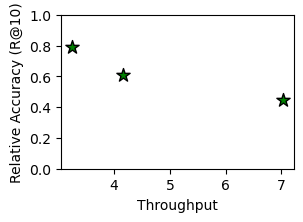

In [6]:
# Ablation study (FLICKR)
normalized_accuracy = 0.72

fig = plt.figure(figsize=(3, 2))



x_layer = np.array([29.6,22.78,12.96])
x = 1 / (x_layer * per_layer_per_sample_infer_time + per_layer_load_time / batch_size)
y = np.array([0.57, 0.44, 0.32]) / normalized_accuracy

plt.scatter(x, y, label='Ous (PE + FG)', color='green', marker='*', s=100, edgecolors='black')

plt.ylim(0, 1)
plt.xlabel('Throughput')
plt.ylabel('Relative Accuracy (R@10)')

# plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0.15), ncol=1, borderaxespad=0, frameon=False, labelspacing=0.6) 
plt.savefig('../figs/eval-case-study.pdf', bbox_inches='tight')
plt.show()

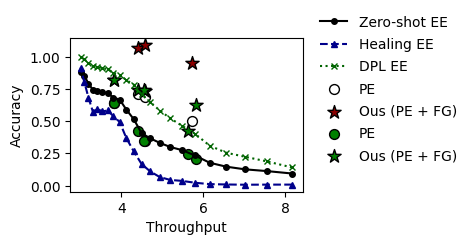

In [15]:
# Ablation study (COCO)
normalized_accuracy = 0.5285
normalized_accuracy2 = 0.5285
data_path = '../data/imagebind_coco.csv'
fig = plt.figure(figsize=(3, 2))
# layer: array 32 to 1 one by one
show_idx = 10
x_layer = np.array(range(1, 33, 1))[show_idx:]
x = 1 / (x_layer * per_layer_per_sample_infer_time + per_layer_load_time / batch_size)
y = np.array(pd.read_csv(data_path).iloc[:, 6])[show_idx:] / normalized_accuracy2 # baseline: zeroshot
y1= np.array(pd.read_csv(data_path).iloc[:, 8])[show_idx:] / normalized_accuracy2 # plora healing. baseline: healing
y2 = np.array(pd.read_csv(data_path).iloc[:, 3])[show_idx:] / normalized_accuracy2 # healing with duel plora (tlora)

# display data points
plt.plot(x, y, label='Zero-shot EE', color='black', linestyle='-', marker='o', markersize=4)
plt.plot(x, y1, label='Healing EE', color='darkblue', linestyle='--', marker='^', markersize=4)
plt.plot(x, y2, label='DPL EE', color='darkgreen', linestyle=':', marker='x', markersize=4)

# TODO check this 
# Dynamic embedding accuracy.
# Raw data: e2e_lora_e2e_predict_model_flicker.csv
# S = [1, 10, 40], Q = 50
# x_layer = np.array([23.15, 18.4, 14.983])
# x = 1 / (x_layer * per_layer_per_sample_infer_time + per_layer_load_time / batch_size)
# y = np.array([0.24, 0.08, 0.05]) / normalized_accuracy

# y1 = np.array([0.63, 0.52, 0.37]) / normalized_accuracy

# (tmp) Dynamic embedding accuracy. Ground truth max
# Raw data: e2e_coco_lora_test_coco_max.csv
# S = [1], Q = 10
x_layer = np.array([16.1814,21.4118,20.5950])
x = 1 / (x_layer * per_layer_per_sample_infer_time + per_layer_load_time / batch_size)
y = np.array([0.26489,0.3737,0.3620]) / normalized_accuracy

y1 = np.array([0.5020,0.5637,0.5776]) / normalized_accuracy


# draw a scatter plot
plt.scatter(x, y, label='PE', color='white', marker='o', s=50, edgecolors='black')
plt.scatter(x, y1, label='Ous (PE + FG)', color='darkred', marker='*', s=100, edgecolors='black')

x_layer = np.array([21.4118,20.5950,24.9898,20.7066,15.9584,16.4932,24.9898])
x = 1 / (x_layer * per_layer_per_sample_infer_time + per_layer_load_time / batch_size)
y = np.array([0.2233,0.182,0.3383,0.1812,0.107,0.1305,0.3383]) / normalized_accuracy

y1 = np.array([0.3911,0.3889,0.4337,0.3938,0.332,0.224,0.4337]) / normalized_accuracy
plt.scatter(x, y, label='PE', color='green', marker='o', s=50, edgecolors='black')
plt.scatter(x, y1, label='Ous (PE + FG)', color='green', marker='*', s=100, edgecolors='black')

plt.xlabel('Throughput')
plt.ylabel('Accuracy')

plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0.15), ncol=1, borderaxespad=0, frameon=False, labelspacing=0.6) 
plt.savefig('../figs/eval-ablation-coco.pdf', bbox_inches='tight')
plt.show()

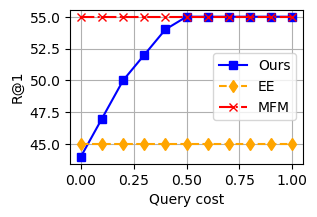

In [49]:
# query cost vs acc

# Example data
fig = plt.figure(figsize=(3, 2))
query_cost = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ee_acc = [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
ours_acc = [44, 47, 50, 52, 54, 55, 55, 55, 55, 55, 55]
mfm_acc = [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]

plt.plot(query_cost, ours_acc, label='Ours', marker='s', linestyle='-', color='blue')
plt.plot(query_cost, ee_acc, label='EE', marker='d', linestyle='--', color='orange')
plt.plot(query_cost, mfm_acc, label='MFM', marker='x', linestyle='-.', color='red')

plt.xlabel('Query cost')
plt.ylabel('R@1')
plt.title('')
plt.legend(loc='best')
plt.grid(True)

plt.savefig('../figs/eval-query.pdf', bbox_inches='tight')
plt.show()